In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('qbo_inflows.csv')

In [13]:
df.shape

(977, 5)

In [20]:
df.head()

,business_id,business_industry_group,time_period,qbo_revenue,inflows
0,3749,Non-Profit and Religious,2021 Q2,221051.25,226435.24
1,4021,Health Care Equipment & Services,2021 Q2,730804.75,743141.84
2,5336,Health Care Equipment & Services,2021 Q2,448427.98,451832.17
3,608,Consumer Durables & Apparel,2021 Q2,1158804.23,1577420.84
4,42,Software & Services,2021 Q2,75935.75,1903304.80


## QBO Revenue vs Inflows

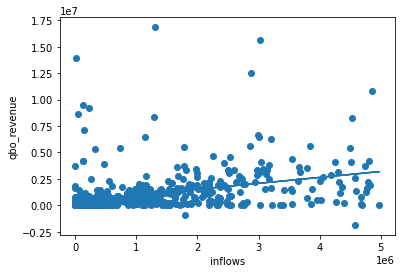

In [16]:
cond_1 = df['qbo_revenue'] < 20000000
cond_2 = df['inflows'] < 5000000
new_df = df.loc[(cond_1) & (cond_2)]
x = new_df['ianflows']
y = new_df['qbo_revenue']
plt.scatter(x, y)
plt.xlabel('inflows')
plt.ylabel('qbo_revenue')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)


In [18]:
df.describe()

,business_id,qbo_revenue,inflows
count,977.000000,9.770000e+02,7.150000e+02
mean,4095.940635,1.853827e+06,5.277710e+06
std,2544.262012,4.276208e+06,2.507004e+07
min,5.000000,-1.859990e+06,0.000000e+00
25%,950.000000,1.408322e+05,2.662525e+05
50%,4966.000000,5.108587e+05,1.013555e+06
75%,6100.000000,1.658329e+06,2.909828e+06
max,8311.000000,6.701060e+07,5.469618e+08


## Does cutting by relevant industry_group make a difference?

In [32]:
industry_df = df.loc[df['business_industry_group'].isin(['Consumer Durables & Apparel', 'Food, Beverage & Tobacco','Retailing', 'Household & Personal Products',
                                                        'Consumer Staples', 'Capital Goods', 'Technology Hardware & Equipment', 'Consumer Discretionary', 
                                                        'Automobiles & Components'])]

industry_df.shape

(173, 5)

In [31]:
industry_df.describe()

,business_id,qbo_revenue,inflows
count,173.000000,1.730000e+02,1.230000e+02
mean,3824.791908,2.655314e+06,7.745747e+06
std,2560.848055,4.910311e+06,2.241768e+07
min,34.000000,-3.894800e+02,0.000000e+00
25%,705.000000,2.776331e+05,4.875675e+05
50%,4888.000000,1.143313e+06,1.577421e+06
75%,5738.000000,2.538281e+06,4.732890e+06
max,8126.000000,4.320038e+07,1.703365e+08


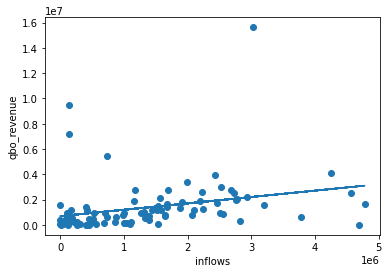

In [28]:
cond_1 = df['qbo_revenue'] < 20000000
cond_2 = df['inflows'] < 5000000
industry_df = industry_df.loc[(cond_1) & (cond_2)]
x = industry_df['inflows']
y = industry_df['qbo_revenue']
plt.scatter(x, y)
plt.xlabel('inflows')
plt.ylabel('qbo_revenue')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
